# Data Visualisation and Machine Learning of the Titanic Dataset

## Importing Packages and Dataset

In [4]:
#ML packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split, GridSearchCV      
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

#Reset seaborn colour palette to be colourblind friendly
sns.reset_orig()
my_palette = sns.color_palette('colorblind')

In [5]:
#Import the csv file dataset
titanic = pd.read_csv("titanic.csv")
titanic

,Passenger_Id,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [38]:
#Dataset information
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 714 entries, 0 to 713
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Passenger_Id  714 non-null    int64  
 1   Survived      714 non-null    int64  
 2   Class         714 non-null    int64  
 3   Name          714 non-null    object 
 4   Sex           714 non-null    object 
 5   Age           714 non-null    float64
 6   SibSp         714 non-null    int64  
 7   Parch         714 non-null    int64  
 8   Ticket        714 non-null    object 
 9   Fare          714 non-null    float64
 10  Embarked      712 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 61.5+ KB


In [39]:
#Show the data types
titanic.dtypes

Passenger_Id      int64
Survived          int64
Class             int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked         object
dtype: object

In [40]:
#Show unique variable elements
titanic.Embarked.unique

<bound method Series.unique of 0      S
1      C
2      S
3      S
4      S
      ..
709    Q
710    S
711    S
712    C
713    Q
Name: Embarked, Length: 714, dtype: object>

In [41]:
#Count the unique elements in the variable
titanic.Embarked.value_counts()

Embarked
S    554
C    130
Q     28
Name: count, dtype: int64

In [42]:
titanic.Sex.value_counts()

Sex
male      453
female    261
Name: count, dtype: int64

In [43]:
#Check for missing values
titanic.isna().sum()

Passenger_Id    0
Survived        0
Class           0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        2
dtype: int64

In [44]:
#Change variable type
titanic.Class = titanic.Class.astype(object)

In [45]:
#Describe the dataset
titanic.describe()

,Passenger_Id,Survived,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,448.582633,0.406162,29.712185,0.512605,0.431373,34.694514
std,259.119524,0.491460,14.528740,0.929783,0.853289,52.918930
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.250000,0.000000,20.250000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,28.000000,0.000000,0.000000,15.741700
75%,677.750000,1.000000,38.000000,1.000000,1.000000,33.375000
max,891.000000,1.000000,80.000000,5.000000,6.000000,512.329200


In [46]:
#Create a new column for family containing parents, children and the passanger themsleves
titanic['Family size'] = titanic['SibSp'] + titanic['Parch'] + 1

titanic
#To see the last rows of the table use titanic.tail() 
#To see the first few rows of the use titanic.head()

,Passenger_Id,Survived,Class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
709,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,Q,6
710,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1
711,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,1
712,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1


## Visualisations

### Bar Plots

In [47]:
pd.DataFrame(titanic[['Sex', 'Survived', 'Class']].value_counts())

count
Sex    Survived Class       
male   0        3        215
                2         84
female 1        1         82
                2         68
male   0        1         61
female 0        3         55
       1        3         47
male   1        1         40
                3         38
                2         15
female 0        2          6
                1          3

In [48]:
#Group the results
titanic.groupby(['Survived', 'Class', 'Sex']).size()

Survived  Class  Sex   
0         1      female      3
                 male       61
          2      female      6
                 male       84
          3      female     55
                 male      215
1         1      female     82
                 male       40
          2      female     68
                 male       15
          3      female     47
                 male       38
dtype: int64

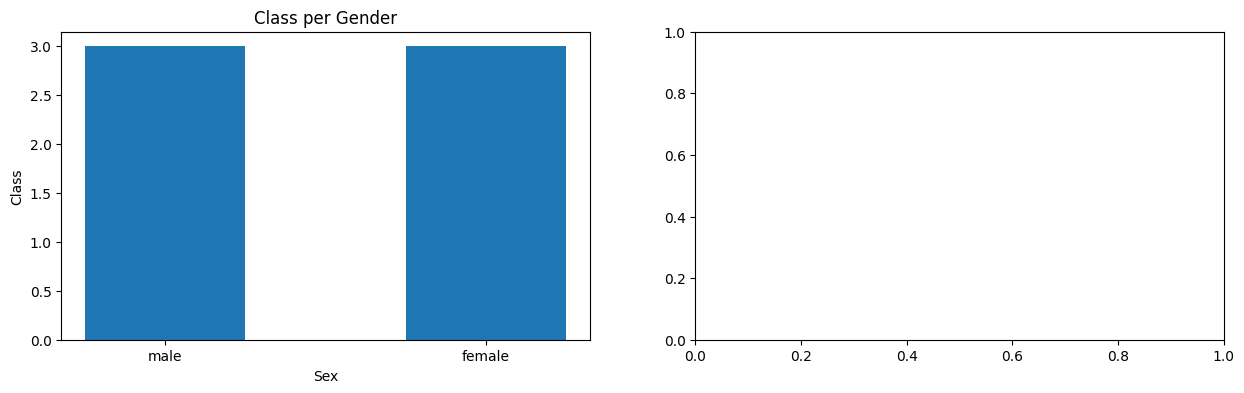

In [6]:
#Bar plots of sex, class and survival relationship
fig, ax = plt.subplots(1,2, figsize=(15,4))
ax[0].bar(titanic["Sex"], titanic["Class"], alpha = 0.6, width = 0.5)

ax[0].set_ylabel('Class')
ax[0].set_xlabel('Sex')
ax[0].title.set_text("Class per Gender")

## Machine Learning

In [ ]:
#Dataset details
X_initial, y = fetch_openml("titanic", version=1, as_frame=True, return_X_y=True)
combine_dataset = pd.concat([X_initial, y], axis=1)
combine_dataset.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0
3,1,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0
4,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",0


In [8]:
#Features from the dataset
features = ['age', 'fare','embarked','sex','pclass']
X = X_initial[features].copy()